# Критерии согласия

Критериями согласия (goodness of fit tests) называют статистические критерии, предназначенные для проверки гипотез о виде распределения наблюдаемой генеральной совокупности. Критерии согласия отвечают на вопрос, насколько хорошо экспериментальные данные согласуются с предполагаемой статистической моделью генеральной совокупности.

Мы до сих пор работали в предположении, что наша выборка взята из нормального распределения. На самом деле, это утверждение неплохо было бы проверять.

В Python, как и в любых других статистических пакетах, уже реализованы многие критерии, которые мы изучали. Давайте посмотрим, как применять эти критерии на практике.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(123)

## Критерий Колмогорова
Начнем с критерия согласия Колмогорова. Этот критерий проверяет простую гипотезу о принадлежности выборки некоторому (непрерывному!) закону распределения. Если это распределение нормальное, то критерий Лилиефорса. Идея состоит в следующем: давайте сравним функции распределения двух распределений и если они сильно отличаются, то и распределения различны.

<img src="data/kolmogorov_1.png" alt="Drawing" style="width: 700px;"/>

Различие функций распределения можно посчитать по-разному, и это будут различные критерии (критерий Крамера-Мизеса еще называют омега квадрат):

<img src="data/kolmogorov_2.png" alt="Drawing" style="width: 700px;"/>
<img src="data/kolmogorov_3.png" alt="Drawing" style="width: 700px;"/>

Критерий Колмогорова реализован с помощью функции kstest в модуле stats:
* **stats.kstest(sample, cdf)** — тут sample — реализация нашей выборки и cdf — функция распределения закона, с которым сравниваем.

In [2]:
n = 500 # размер выборки

In [3]:
sample1 = np.random.rand(n) # выборка 1 из равномерного распределения на [0,1]
sample2 = np.random.beta(2,2,size = n) # выборка 2 из бета-распределения с параметрами (2,2)

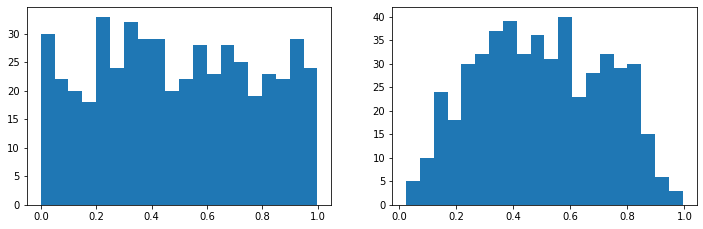

In [4]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(sample1, bins=20)
plt.subplot(2,2,2)
plt.hist(sample2, bins=20)
plt.show()

In [5]:
# Запускаем критерий Колмогорова для sample1, 
# проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1].
# Должны получить большой p-value (что будет означать, что значение статистики попало в область вероятных значений).

stats.kstest(sample1, stats.uniform.cdf)

KstestResult(statistic=0.02977893867201975, pvalue=0.7553346739924274)

In [6]:
# Запускаем критерий Колмогорова для sample2, 
# проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1].
# Должны получить малый p-value (что будет означать, что значение статистики попало в область маловероятных значений).

stats.kstest(sample2, stats.uniform.cdf)

KstestResult(statistic=0.109059197161369, pvalue=1.2372423114520465e-05)

In [7]:
# Запускаем критерий Колмогорова для sample1, 
# проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).
# Обратите внимание на то, как передавать параметры для функции плотности.

stats.kstest(sample1, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.09860184733194155, pvalue=0.00011034826529907896)

In [8]:
# Запускаем критерий Колмогорова для sample2, 
# проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).

stats.kstest(sample2, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.02371261906513944, pvalue=0.93486405001062)

## Критерий $\chi^2$


**Выборка**    $X_n = {X_1 ... X_n}$ из нормального распределения , при этом $\sigma$ неизвестно.

**Нулевая гипотеза**    $H_0: F(x, \theta) \sim G(x)$

**Альтернативная гипотеза**     $H_1: F(x, \theta) \not\sim  G(x) $ 

Мы разбиваем область определения нашей величины на $K$ интервалов (бакетов/карманов). Границы этих интервалов – $a_i$. Подсчитаем следующие значения:

$n_i$ - количество элементов нашей выборки в интервале $[a_i,a_{i+1}]$

$p_i$ - вероятность попадания значения в интервал $[a_i,a_{i+1}]$ при условии справедливости $H_0$. Нам для этого надо будет взять функцию распределения и посчитать ее разность в точках $a_i$ и $a_{i+1}$:

$p_i = \int_{a_i}^{a_{i+1}} g(x)dx$





**Статистика** $\chi^2(X_n) = \sum^{K}_{i=1}\dfrac{(n_i-np_i)^2}{np_i}$

**Нулевое распределение** $\chi^2(X_n) = \chi^2_{K - r - 1}$ , где r - число неизвестных параметров распределения


Теперь перейдем к критерию согласия хи-квадрат. Этот критерий реализован с помощью функции chisquare в модуле stats:
    
* **stats.chisquare(obs, exp)** — тут obs — количества попаданий в каждую "ячейку" и exp — ожидаемые количества попаданий в каждую "ячейку".

P.S. Обратите внимание на то, что мы передаем в функцию chisquare не вероятности (эмпирические и истинные), а количества!

В экспериментах с селекцией гороха Мендель наблюдал частоты различных видов семян, получаемых при скрещивании растений с круглыми желтыми семенами и растений с морщинистыми зелеными семенами. Эти данные и значения теоретических вероятностей, определяемые в соответствии с законом Менделя, приведены в следующей таблице:

| Тип семян            | Частота | Вероятность |
|:-------------------- |:-------:| -----------:|
| Круглые и желтые     | 315/556 | 9/16        |
| Морщинистые и желтые | 101/556 | 3/16        |
| Круглые и зеленые    | 108/556 | 3/16        |
| Морщинистые и зеленые| 32/556  | 1/16        |

Необходимо проверить гипотезу $H_0$ о согласованности частот с теоретическими вероятностями при помощи критерия хи-квадрат.

In [9]:
# занесем данные из таблицы в массивы

obs = np.array([315/556, 101/556, 108/556, 32/556])
exp = np.array([9/16, 3/16, 3/16, 1/16])

In [10]:
# вспомним о том, что в функцию chisquare мы должны передавать количества, а не частоты

obs = obs*556
exp = exp*556

In [11]:
# запускаем критерий хи-квадрат

stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.4700239808153487, pvalue=0.9254258951036157)

## Проверка нормальности

Очень важный тип критериев согласия — это проверка нормальности. Можно использовать для этого стандартные критерии согласия, но лучше воспользоваться специализированными: 

* **qqplot(sample, dist, line='r')** — построение квантильного графика (Q-Q Plot) — визуальная проверка любого критерия согласия о масштабе/сдвиге. Аргументы: sample — наша выборка, dits — распределение, с которым сравниваем (если этот параметр не указан, то используется нормальное распределение), line='r' — подгоняет прямую под облако точек, чтобы было проще визуально сравнивать.
* **stats.shapiro(sample)** — критерий Шапиро-Уилка. Аргументы: sample — наша выборка.
* **stats.jarque_bera(sample)** — критерий Харке-Бера. Аргументы: sample — наша выборка.

### Чтобы построить QQ-график, нужно:

* отсортировать выборку по неубыванию.
* каждая точка выборки ставится на QQ-график, значения отображаются по оси Y
* значение по Х - мат.ожидание квантиля распределения N(0,1), посчитанного по выборке такого как в нашем эксперименте объема.

Понятно, что в случае нормальной выборки этот график должен лечь на прямую или, по крайней мере, быть близок к ней. Если ваши точки лучше описываются не прямой, а какой-то другой функцией, то наверняка ваше выборка далека от нормальности. 

In [12]:
# поменяем размер выборки, если нужно

n = 500

In [13]:
sample1 = np.random.normal(1,2, size=n) # выборка из нормального распределения
sample2 = np.random.beta(2,2,size = n) # выборка из бета-распределения с параметрами (2,2)

In [14]:
from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

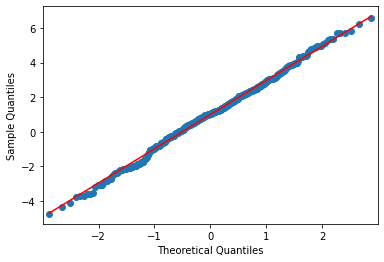

In [15]:
# график квантилей для sample1

qqplot(sample1, line='s')
plt.show()

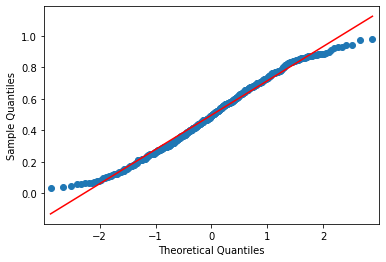

In [16]:
# график квантилей для sample2

qqplot(sample2, line='s')
plt.show()

## Критерий Шапиро-Уилка
<img src="data/shapiro.png" alt="Drawing" style="width: 700px;"/>


In [17]:
# запускаем критерий Шапиро-Уилка для sample1

stats.shapiro(sample1)

ShapiroResult(statistic=0.9959383010864258, pvalue=0.2265419065952301)

In [18]:
# запускаем критерий Шапиро-Уилка для sample2

stats.shapiro(sample2)

ShapiroResult(statistic=0.9849844574928284, pvalue=4.944821193930693e-05)

## Критерий Харке-Бера

$\gamma_1, \gamma_2$ - Коэффициент ассиметрии и эксцесса
<img src="data/ber.png" alt="Drawing" style="width: 700px;"/>


In [19]:
# запускаем критерий Харке-Бера для sample1

stats.jarque_bera(sample1)

Jarque_beraResult(statistic=0.5047526531339083, pvalue=0.7769522952554369)

In [20]:
# запускаем критерий Харке-Бера для sample2

stats.jarque_bera(sample2)

Jarque_beraResult(statistic=13.737779567593636, pvalue=0.001039630638919098)

## Заключение о проверке нормальности

* выбросы: сильно влияют на выборочные коэффициенты асимметрии и эксцесса
* критерий Лиллиефорса: представляет только исторический интерес
* критерий хи-квадрат: слишком общий, не самый мощный, потеря информации из-за разбиения на интервалы
<img src="data/table.png" alt="Drawing" style="width: 700px;"/>

## А зачем нам вообще проверять нормальность?

Часто используются тесты, предполагающие нормальность данных, но t-тесты, например, работают и в случае некоторого отклонения от нормальности. В реальной жизни нормальных выборок не существует, потому что нормальное распределение - модель, она должна **в каком-то смысле** адекватно описывать реальную ситуацию. Кроме того, проверка нормальности - тоже статистический тест, а значит на маленьких выборках мы почти никогжа не сможем отвергнуть нормальность, а на очень больших выборках – почти всегда будем ее отвергать. Поэтому предлагаю следующий способ использования:

1) Смотрим на специфику наших данных. Если они категориальные или бинарные, лучше использовать специальные критерии для них.

2) Если величина непрерывная, постройте QQ-график. Если на нем выборка не очень сильно отклоняется от прямой, можно смело применять устойчивые к небольшим отклонениям методы. Например критерий Стьюдента.

3) Если ваш метод все-таки чувствителен к нормальности, оцифруйте отклонение с помощью критерия Шапиро-Уилка 

4) Если критерий Шапиро-Уилка отвергает нормальность, лучше применить другой метод (например непараметрический, который не делает никаких предположений о конкретном характере распределения)


#  Критерии знаков

Критерий знаков - непараметрический критерий, который позволяет проверять гипотезы равенства медианы какому-то наперед заданному значению (одновыборочный критерий знаков) или равенства нулю разности медиан в двух связанных выборках (критерий знаков для двух связанных выборок). 

**Плюсы:** Критерий не использует вообще никаких предположений о распределениях наших факторов и достаточно легок в вычислении.

**Минусы:** Эмпирически показано, что имеет меньшую мощность (вероятность ошибки 2 рода больше), чем другие, более специализированные критерии



# Одновыборочный критерий

Вы прогуливались по Таймс-скверу и решили поспрашивать у прохожих их годовую зарплату в долларах. Почти наверное такое распределение будет сильно скошено. Где-то вы слышали, что средняя зарплата в этом районе города около 50000 долларов в год. Вы получили следующие данные в ходе опроса:

In [21]:
salaries = [8478,21564,36562,176602,9395,18320,50000,2,40298,39,10780,2268583,3404930]

In [22]:
from statsmodels.stats.weightstats import *

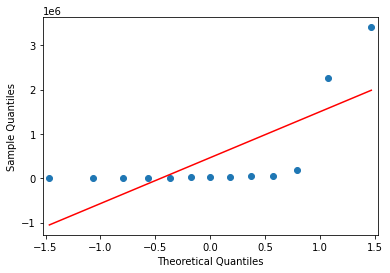

In [23]:
qqplot(np.array(salaries), line='s')
plt.show()

Наши данные от нормальности весьма далеки.

**Выборка**    $X_n = {X_1 ... X_n}$ 

**Нулевая гипотеза**    $H_0: median(X) = M$

**Альтернативная гипотеза**     $H_1: median(X) \not= M$ (двусторонняя альтернатива)

**Статистика** $T(X_n) = \sum_i[X_i>M]$ Здесь $[]$- индикаторная функция (равна 1, если условие в скобках истинно и нулю в противном случае)

**Нулевое распределение** $T \sim Binomial(n,\dfrac{1}{2})$

In [24]:
from statsmodels.stats.descriptivestats import sign_test

In [25]:
sign_test(salaries, 50000)

(-3.0, 0.14599609375)

Нулевая гипотеза НЕ отвергается (По данным нельзя сказать, что 50000 - плохая оценка медианы).

# Критерий для двух связанных выборок

**Выборки**    $X_1^{n1} = {X_{11} ... X_{1n_1}}$ и выборка $X_2^{n2} = {X_{21} ... X_{2n_2}}$ 

**Нулевая гипотеза**    $H_0: P(X_1 > X_2) = \frac{1}{2}$

**Альтернативная гипотеза**     $H_1: P(X_1 > X_2) \not= \frac{1}{2}$ (Двусторонняя альтернатива)

**Статистика** $T(X_n) = \sum_i[X_{1i}> X_{2i}]$ Здесь $[]$- индикаторная функция (равна 1, если условие в скобках истинно и нулю в противном случае)

**Нулевое распределение** $T(X_1^{n1},X_2^{n2}) \sim Binomial(n,\dfrac{1}{2})$

Рассмотрим следующую задачу:
Пусть мы хотим сравнить то, как работают различные алгоритмы машинного обучения  . Воспользуемся [данными](https://github.com/catboost/benchmarks/tree/master/quality_benchmarks) о качестве работы популярного метода градиентного бустинга Catboost c тюнингом гиперпараметров. О методологии можно прочесть [Здесь](https://github.com/catboost/benchmarks/blob/master/quality_benchmarks/comparison_description.pdf). Качество работы измерено с помощью показателя LogLoss, важно понимать, что чем он меньше, тем результат работы классификатора лучше. Проверим гипотезу о том, что "В среднем" LogLoss, который показывает другой алгоритм - LightGBM - больше, чем у Catboost.

In [26]:
from bs4 import BeautifulSoup
import requests

In [27]:
url = BeautifulSoup(requests.get('https://github.com/catboost/benchmarks/tree/master/quality_benchmarks').text)

In [28]:
table = url.find_all('table')[0]

In [29]:
catboost, lightgbm, difference = [], [], []
for row in table.find_all('tr')[1:]:
    c = float(row.find_all('td')[2].text.split()[0])
    catboost.append(c)
    
    l = float(row.find_all('td')[4].text.split()[0])
    lightgbm.append(l)
    difference.append(l - c)



In [30]:
sign_test(difference)

(4.5, 0.00390625)

Критерий уверенно отвергает гипотезу о совпадении средних (В самом деле - Catboost почти везде победил)

Общий смысл того, что мы делали до сих пор – попытка превратить выборку из неизвестного нам распределения в бинарную.

# Критерии рангов

Превращая выборку в список бинарных величин мы , на самом деле, отбрасываем значительную часть информации, которая в выборке содержится (отсюда и снижение мощности критерия). Давайте попробуем сохранить еще какую-то часть информации о выборке, а именно – порядок следования элементов или ранг. 

## Критерий Манна-Уитни

**Выборки**    $X_1^{n1} = {X_{11} ... X_{1n_1}}$ и выборка $X_2^{n2} = {X_{21} ... X_{2n_2}}$ 

Часто говорят, что критерий проверяет гипотезу о сдвиге распределений, из которых взяты выборки друг относительно друга. По сути, это не совсем так.  Гипотезу часто формулируют как "выборки взяты из одного распределения". Здесь имеется в виду, что если взять вариационный ряд из двух выборок, значения из первой и второй выборок будут по нему равномерно рассеяны. Чем меньше значение критерия, тем вероятнее, что различия между значениями параметра в выборках достоверны. То есть:

**Нулевая гипотеза**: $F_{X_1} = F_{X_2}$ - значения из выборок равномерно рассеяны в вариационном ряде.

**Альтернативная гипотеза (двусторонняя альтернатива)**  $F_{X_1} \not= F_{X_2}$ - значения в какой-то из выборок рассеяны в вариационном ряде неравномерно.


**Статистика** Уложим обе наши выборки в один вариационный ряд. После чего подсчитаем сумму рангов, приходящуюся на элементы первой выборки ($R_1$) и на элементы  второй выборки ($R_2$). 

$$U_1 = n_1n_2 + \dfrac{n_2(n_2+1)}{2} - R_1$$

$$U_2 = n_1n_2 + \dfrac{n_1(n_1+1)}{2} - R_2$$

$$U = min(U_1, U_2)$$

**Нулевое распределение** Табличное, но есть нормальное приближение :)


Если выборки взяты из одного распределения, то каждый из рангов мог равновероятно реализоваться в первой или второй выборке. Всего вариантов реализаций рангов будет $C^{n1}_{n_1+n_2}$. Давайте переберем их все и на каждом из этих вариантов мы получим значение статистики Манна-Уитни. Удивительно, но уже при 10 объектах в каждой из выборок распределение критерия очень похоже на нормальное вот с такими параметрами:

$$R_1 \sim N(\dfrac{n_1(n_1+n_2+1)}{2},\dfrac{n_1n_2(n_1+n_2+1)}{12})$$

Например в известном нам пакете Scipy p-value для критерия Манна-Уитни именно с помощью его нормальной аппроксимации.

In [31]:
from scipy.stats import mannwhitneyu


Говорят "быстрая" сортировка aka Quicksort хорошо работает на реальных данных. Кроме того, говорят, что не менее известная сортировка MergeSort тоже довольно хороша, причем даже для весьма плохих случаев. Не вдаваясь в особенности амортизационного анализа алгоритмов, давайте проведем эксперимент и измерим время работы алгоритмов Quicksort и MergeSort и проверим, что же быстрее работает на случайных данных.
Реализуем сортировку Quicksort. Как это работает можно посмотреть [здесь](https://www.youtube.com/watch?v=7h1s2SojIRw&t=366s). За опорную точку будем выбирать начальный элемент.

А MergeSort работает [так](https://www.youtube.com/watch?v=mB5HXBb_HY8).

Сравнивать наши результаты мы будем в предположении, что генератор случайных чисел в среднем создает списки, одинаково сложные для сортировки.

In [32]:
def partition(array, start, end):
    pivot = start 
    for i in range(start+1, end+1):
        if array[i] <= array[start]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[start] = array[start], array[pivot]
    return pivot
 
def quick_sort(array, start=0, end=None):
    if end is None:
        end = len(array) - 1
    
    def _quicksort(array, start, end):
        if start >= end:
            return 
        pivot = partition(array, start, end)
        _quicksort(array, start, pivot-1)
        _quicksort(array, pivot+1, end)
    return _quicksort(array, start, end)

def merge(left_list, right_list):  
    sorted_list = []
    left_list_index = right_list_index = 0

    # Длина списков часто используется, поэтому создадим переменные для удобства
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        if left_list_index < left_list_length and right_list_index < right_list_length:
            # Сравниваем первые элементы в начале каждого списка
            # Если первый элемент левого подсписка меньше, добавляем его
            # в отсортированный массив
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
            # Если первый элемент правого подсписка меньше, добавляем его
            # в отсортированный массив
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # Если достигнут конец левого списка, элементы правого списка
        # добавляем в конец результирующего списка
        elif left_list_index == left_list_length:
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
        # Если достигнут конец правого списка, элементы левого списка
        # добавляем в отсортированный массив
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    return sorted_list

def merge_sort(nums):  
    # Возвращаем список, если он состоит из одного элемента
    if len(nums) <= 1:
        return nums

    # Для того чтобы найти середину списка, используем деление без остатка
    # Индексы должны быть integer
    mid = len(nums) // 2

    # Сортируем и объединяем подсписки
    left_list = merge_sort(nums[:mid])
    right_list = merge_sort(nums[mid:])

    # Объединяем отсортированные списки в результирующий
    return merge(left_list, right_list)


In [33]:
from datetime import datetime as dt

quicksorted, mergesorted = [], []

for _ in range(400):
    l = list(np.random.rand(500))
    t0 = float(dt.utcnow().timestamp())
    f = quick_sort(l)
    t1 =  float(dt.utcnow().timestamp()) - t0
    quicksorted.append(t1)
    
for _ in range(400):
    l = list(np.random.rand(500))
    t0 = float(dt.utcnow().timestamp())
    f = merge_sort(l)
    t1 =  float(dt.utcnow().timestamp()) - t0
    mergesorted.append(t1)

In [34]:
import matplotlib.pyplot as plt

In [35]:
y, x = np.histogram(np.array(quicksorted), bins = 30)


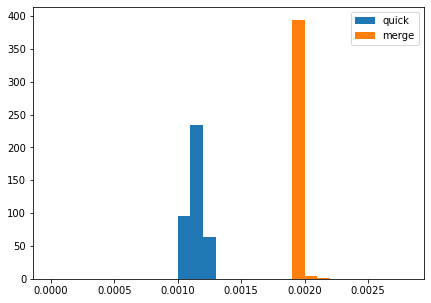

In [36]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(7,5))
hist = axs.hist(quicksorted, np.arange(0, max(quicksorted), 0.0001), label = 'quick') 
hist2 = axs.hist(mergesorted, np.arange(0, max(mergesorted), 0.0001), label = 'merge')
plt.legend()
plt.show()

Вообще говоря, оба распределения не нормальные (Как минимум - они ограничены слева нулем). Поэтому чтобы протестировать значимость этого различия мы будем использовать критерий Манна-Уитни.

In [37]:
mannwhitneyu(quicksorted, mergesorted)

MannwhitneyuResult(statistic=0.0, pvalue=2.233346183303549e-132)

Критерий Манна-Уитни уверенно отвергает гипотезу. На гистограмме мы видим, что перекрытие распределений (а соответственно и элементов вариационного ряда) много меньше, чем доля значений, изолированных друг от друга. Именно о том, что два распределения "раздвинуты" и говорит критерий.